In [1]:
from python_folder.utils import *
from python_folder.model_vae import *
from python_folder.train_vae import *

/Users/Aurel/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/drawSvg/raster.py:18: RuntimeWarning: Failed to import CairoSVG. drawSvg will be unable to output PNG or other raster image formats. See https://github.com/cduck/drawSvg#prerequisites for more details.
Original OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': dlopen(libcairo.so.2, 0x0002): tried: '/Users/Aurel/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/../../libcairo.so.2' (no such file), '/Users/Aurel/opt/anaconda3/envs/myenv/bin/../lib/libcairo.so.2' (no such file), 'libcairo.so.2' (no such file), '/usr/local/lib/libcairo.so.2' (no such file), '/usr/lib/libcairo.so.2' (no such file), '/Users/Aurel/Documents/PFE/CODE/SVG/Clean_Folder/libcairo.so.2' (no such file), '/usr/local/lib/libcairo.so.2' (no such file), '/usr/lib/libcairo.so.2' (no such file)
cannot load library 'libcairo.2.dylib': dlopen(libc

# First, we need to create a dataset of smileys: 


In [4]:
length = 7000  #the length of the data set 
tensor_data = []

for i in range(length):    
    x = generate_matrix()
    tensor_data.append(torch.from_numpy(x))

In [5]:
# Split the data set into train_set, val_set and test_set:
train_set, val_set, test_set = torch.utils.data.random_split(tensor_data, [5000, 1000, 1000])

In [6]:
# Dataloader: 

train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=10, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(test_set, batch_size=10, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=10, shuffle=True)

# Train a model or directly load a pre-trained model: 


- The pre-trained models are stored in the path "state_dict_VAE_Beta=0.1.pt" for the VAE with $\beta = 0.1$, "state_dict_VAE_Beta=1.pt" for the VAE with $\beta = 1$, and "state_dict_VAE_Beta=2.pt" for the VAE with $\beta = 2$



## 1 - To run a training with a new model: 

In [7]:
# Dimension of the latent space:
latent_dims = 2

# Our Variational AutoEncoder:
VAE = VariationalAutoencoder(latent_dims).to(device) #CPU

# The criterion we consider: 
criterion = nn.MSELoss()

# The optimizer 
optimizer = torch.optim.RMSprop(VAE.parameters(), lr = 0.001, alpha = 0.99, eps = 1e-08, weight_decay = 0, momentum = 0, centered = False)
#optimizer = torch.optim.Adam(VAE.parameters(), lr = 1e-3) # defaut parameters ?  Try with SparseAdam 
#optimizer = torch.optim.SGD(autoencoder.parameters(), lr=1e-3)

### Number of epochs:
epochs = 80

### You can specify the value of beta: 
VAE, train_loss, val_loss = train(VAE, train_dataloader, val_dataloader, criterion, optimizer, epochs, beta = 1)

Epoch 1 of 80, Train Loss: 319.595, Val Loss:308.175
Validation loss decreased (inf --> 308.175156).  Saving model ...
Epoch 2 of 80, Train Loss: 299.977, Val Loss:303.992
Validation loss decreased (308.175156 --> 303.992479).  Saving model ...
Epoch 3 of 80, Train Loss: 296.974, Val Loss:301.232
Validation loss decreased (303.992479 --> 301.231528).  Saving model ...
Epoch 4 of 80, Train Loss: 294.274, Val Loss:300.890
Validation loss decreased (301.231528 --> 300.890196).  Saving model ...
Epoch 5 of 80, Train Loss: 292.885, Val Loss:298.090
Validation loss decreased (300.890196 --> 298.090381).  Saving model ...
Epoch 6 of 80, Train Loss: 292.127, Val Loss:298.117
EarlyStopping counter: 1 out of 10
Epoch 7 of 80, Train Loss: 292.534, Val Loss:295.002
Validation loss decreased (298.090381 --> 295.001791).  Saving model ...
Epoch 8 of 80, Train Loss: 290.946, Val Loss:295.970
EarlyStopping counter: 1 out of 10
Epoch 9 of 80, Train Loss: 290.082, Val Loss:295.101
EarlyStopping counter:

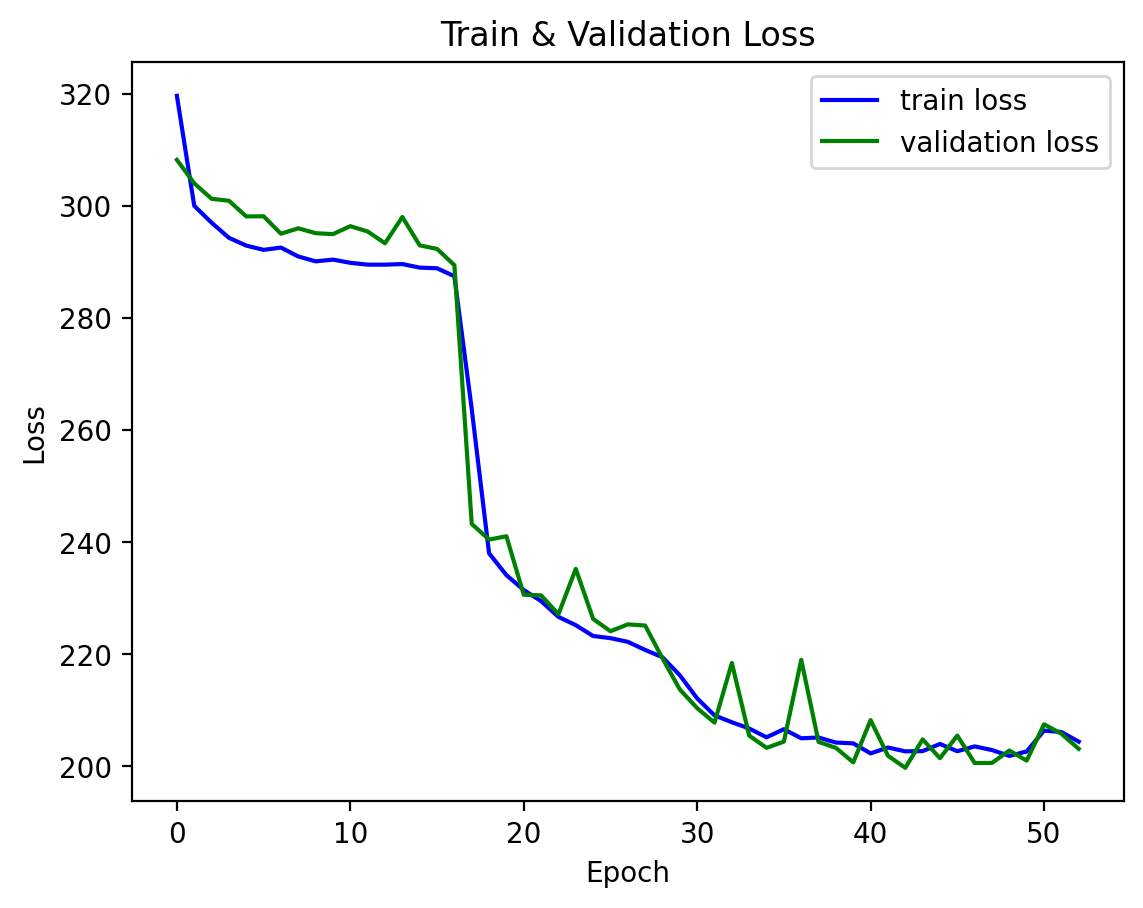

In [8]:
# Plot the Train & Validation Losses after the training: 

plt.figure()
plt.plot(train_loss, 'b', label = "train loss")
plt.plot(val_loss, 'g', label = "validation loss")
plt.title('Train & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
#plt.savefig('plot.png')  # save the plot

## 2 - To load a trained model: 


In [9]:
# Choose a model: 

PATH = "state_dict_VAE_Beta=0.1.pt"
#PATH = "state_dict_VAE_Beta=1.pt"
#PATH = "state_dict_VAE_Beta=2.pt"


VAE = VariationalAutoencoder(latent_dims).to(device)
VAE.load_state_dict(torch.load(PATH))
VAE.eval()

VariationalAutoencoder(
  (encoder): Variational_Encoder(
    (linear1): Linear(in_features=10, out_features=20, bias=True)
    (linear2): Linear(in_features=20, out_features=40, bias=True)
    (linear3): Linear(in_features=40, out_features=80, bias=True)
    (linear4): Linear(in_features=80, out_features=40, bias=True)
    (linear5): Linear(in_features=40, out_features=20, bias=True)
    (linear6): Linear(in_features=20, out_features=5, bias=True)
    (linear7): Linear(in_features=5, out_features=2, bias=True)
    (linear8): Linear(in_features=5, out_features=2, bias=True)
  )
  (decoder): Variational_Decoder(
    (linear1): Linear(in_features=2, out_features=5, bias=True)
    (linear2): Linear(in_features=5, out_features=20, bias=True)
    (linear3): Linear(in_features=20, out_features=40, bias=True)
    (linear4): Linear(in_features=40, out_features=80, bias=True)
    (linear5): Linear(in_features=80, out_features=40, bias=True)
    (linear6): Linear(in_features=40, out_features=20,

# Visualise the differences between the inputs and the ouputs generated:


In [10]:
with torch.no_grad():
    for x in test_dataloader: 
        x = x.to(device)
        x_out = VAE(x.float())
        break
        

In [11]:
x_array = x[1:5].detach().cpu().numpy()  # The inputs
x_out_array = x_out[1:5].detach().cpu().numpy() # The outputs 

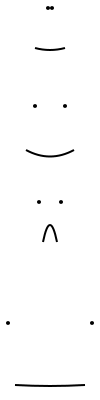

In [12]:
# The inputs: 
draw_column(x_array)

In [13]:
# To save the drawing uncomment this cell: 

#d = draw_column(x_array)
#d.saveSvg("VAE_input_B=2.svg")

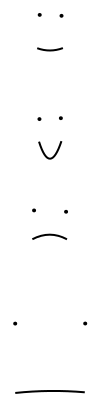

In [14]:
# The outputs: 
draw_column(x_out_array)

In [58]:
# To save the drawing uncomment this cell: 

#d = draw_column(x_out_array)
#d.saveSvg("VAE_output_B=2.svg")

# We can check the distribution in the latent space by passing data only through the encoder:

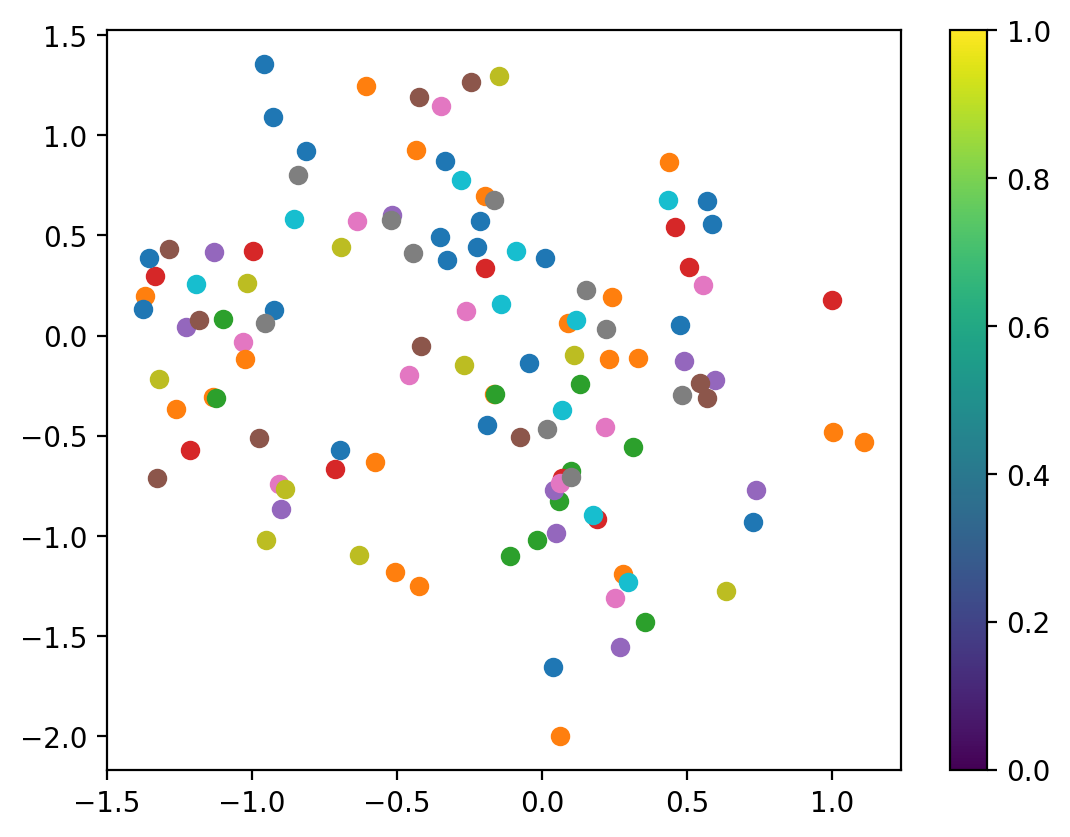

In [15]:
plot_latent_uncond(VAE, train_dataloader) 

- NB: one can see that we have a normal distribution N(0,1)

# Generate a grid of smileys:

In [16]:
# Generate smileys from noisy vectors following a N(0,1) distribution

with torch.no_grad():
    noise = torch.randn(100, 2).to(device) # Choose a sample of 100 latent vectors
    x_out = VAE.decoder(noise)
    x_out = x_out.detach().numpy()

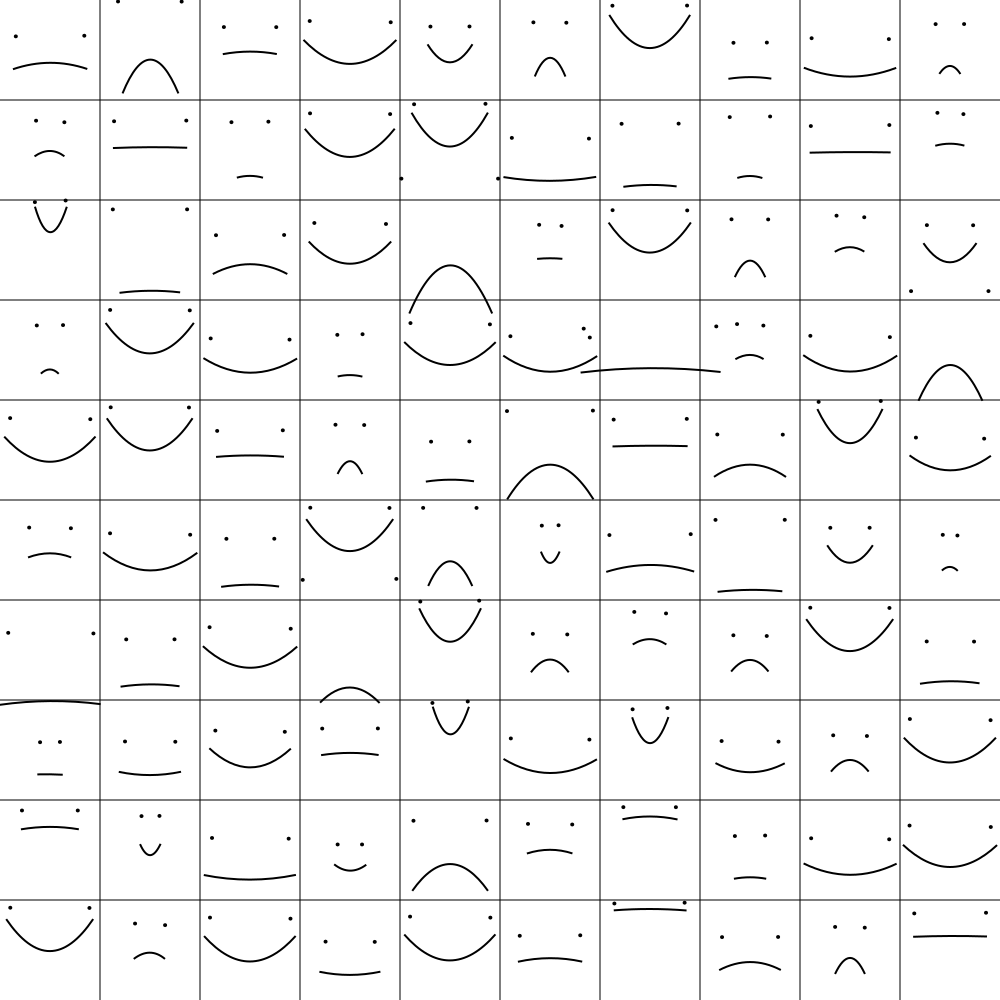

In [18]:
draw_grid(x_out)

In [62]:
# To save the drawing uncomment this cell: 

#d = draw_grid(x_out)
#d.saveSvg('VAE_rand_grid_B=2.svg')

In [19]:
# Generate smileys from vectors z = (z1, z2) with a regular sampling over z1 and z2 (values between -0.9 and 0.9)

with torch.no_grad():
    noise = np.zeros((100, 2)) # Choose a sample of 100 latent vectors
    for i in range(10):
        for j in range(10):
            noise[j + i * 10, 0] = -0.9 + j * 0.2
            noise[j + i * 10, 1] = -0.9 + i * 0.2
    noise = torch.tensor(noise)
    x_out = VAE.decoder(noise.float())
    x_out = x_out.detach().numpy()

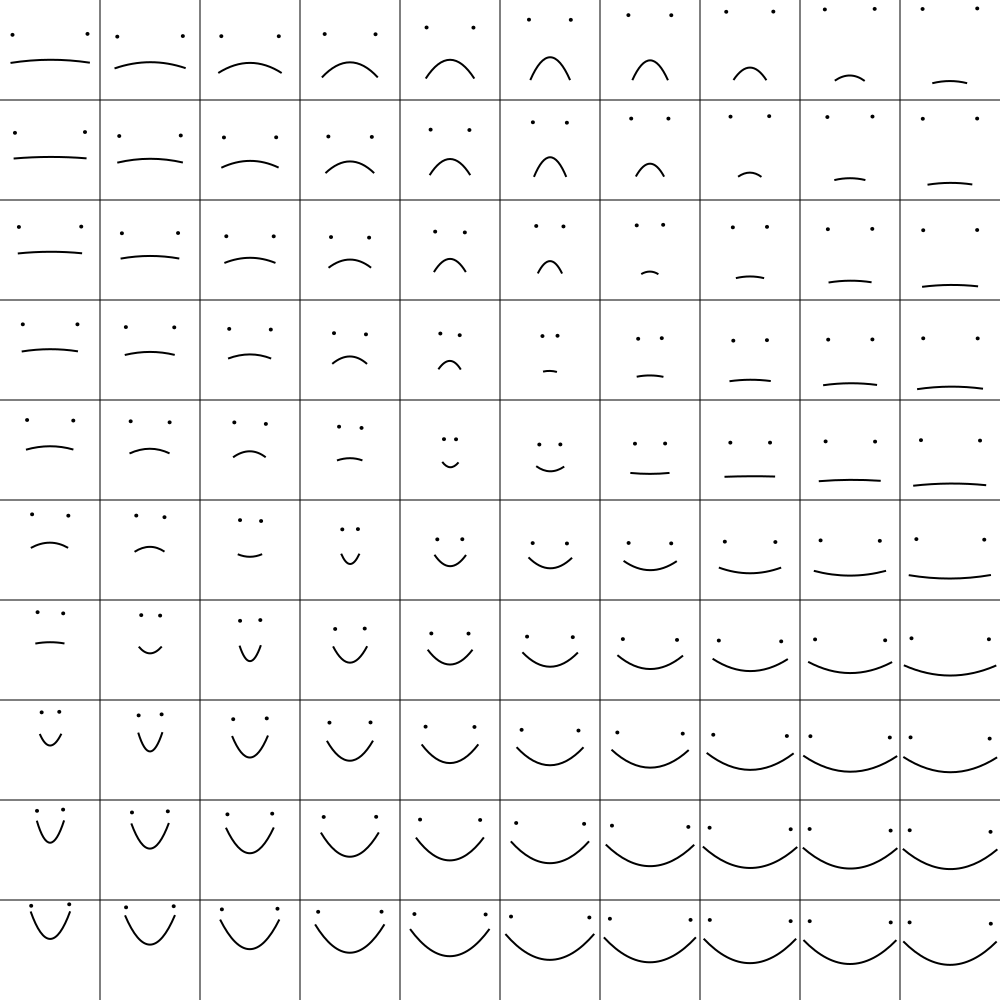

In [20]:
draw_grid(x_out)

In [21]:
# To save the drawing uncomment this cell: 

#d = draw_grid(x_out)
#d.saveSvg("VAE_grid_B=2.svg")

# Generate a smiley from a vector z = (z1, z2): 

In [22]:
# Choice of z: 
z1 = -0.5
z2 = -0.1

In [23]:
z = np.array([[z1, z2]])
z = torch.tensor(z)

x_out = VAE.decoder(z.float())
x_out = x_out.detach().numpy()
x_out = x_out[0]

draw_smiley(x_out)

## To save the model: 


In [68]:
# Specify a path
PATH = "NAME OF THE PATH HERE"

# Save
torch.save(VAE.state_dict(), PATH)